# Тесты с файлами EEG (.set формат)

In [1]:
import mne

In [12]:
!ls /mnt/d/Study/PhD/Data/sample_eyes/fon/fon/Co_y6_003_fon1.set

/mnt/d/Study/PhD/Data/sample_eyes/fon/fon/Co_y6_003_fon1.set


In [13]:
# путь к .set (рядом может лежать .fdt — MNE найдет его сам)
raw = mne.io.read_raw_eeglab('/mnt/d/Study/PhD/Data/sample_eyes/fon/fon/Co_y6_003_fon1.set', preload=True)

print(raw)                       # инфо о данных
print(raw.annotations[:10])      # первые аннотации/евенты
print(set(raw.annotations.description))  # уникальные метки

<RawEEGLAB | Co_y6_003_fon1.set, 128 x 599033 (599.0 s), ~585.1 MiB, data loaded>
<Annotations | 6 segments: S 1 (3), S 2 (3)>
{np.str_('S   2'), np.str_('S   1')}


In [14]:
# Автоматическая нумерация меток -> event_id
events, event_id = mne.events_from_annotations(raw)  # event_id: {desc: int}
print(event_id)
print(events[:10])  # столбцы: [сэмпл, 0, код]

Used Annotations descriptions: [np.str_('S   1'), np.str_('S   2')]
{np.str_('S   1'): 1, np.str_('S   2'): 2}
[[ 36292      0      1]
 [132311      0      2]
 [218231      0      1]
 [305396      0      2]
 [399016      0      1]
 [496607      0      2]]


In [16]:
import numpy as np

sfreq = raw.info["sfreq"]
code_start = event_id["start"]
code_end   = event_id["end"]

t_start = events[events[:, 2] == code_start][:, 0] / sfreq
t_end   = events[events[:, 2] == code_end][:, 0] / sfreq

print("Начала:", t_start)
print("Концы:",  t_end)

Начала: [ 36.292 218.231 399.016]
Концы: [132.311 305.396 496.607]


In [17]:
# Подгоняем по парам в порядке появления
n = min(len(t_start), len(t_end))
intervals = list(zip(t_start[:n], t_end[:n]))
durations = [te - ts for ts, te in intervals]
for i, (ts, te) in enumerate(intervals, 1):
    print(f"Интервал {i}: {ts:.3f}s -> {te:.3f}s, длительность {te-ts:.3f}s")

Интервал 1: 36.292s -> 132.311s, длительность 96.019s
Интервал 2: 218.231s -> 305.396s, длительность 87.165s
Интервал 3: 399.016s -> 496.607s, длительность 97.591s


In [18]:
ann = raw.annotations
starts = [(on, dur, desc) for on, dur, desc in zip(ann.onset, ann.duration, ann.description)
          if desc.lower().startswith("start")]  # или desc == "start"
ends   = [(on, dur, desc) for on, dur, desc in zip(ann.onset, ann.duration, ann.description)
          if desc.lower().startswith("end")]

print("Starts (s):", [on for on, _, _ in starts])
print("Ends   (s):", [on for on, _, _ in ends])

Starts (s): []
Ends   (s): []


Частота дискретизации: 1000.00 Гц
Количество сэмплов: 599033
Длина записи: 599.03 сек (9.98 мин)
Using matplotlib as 2D backend.


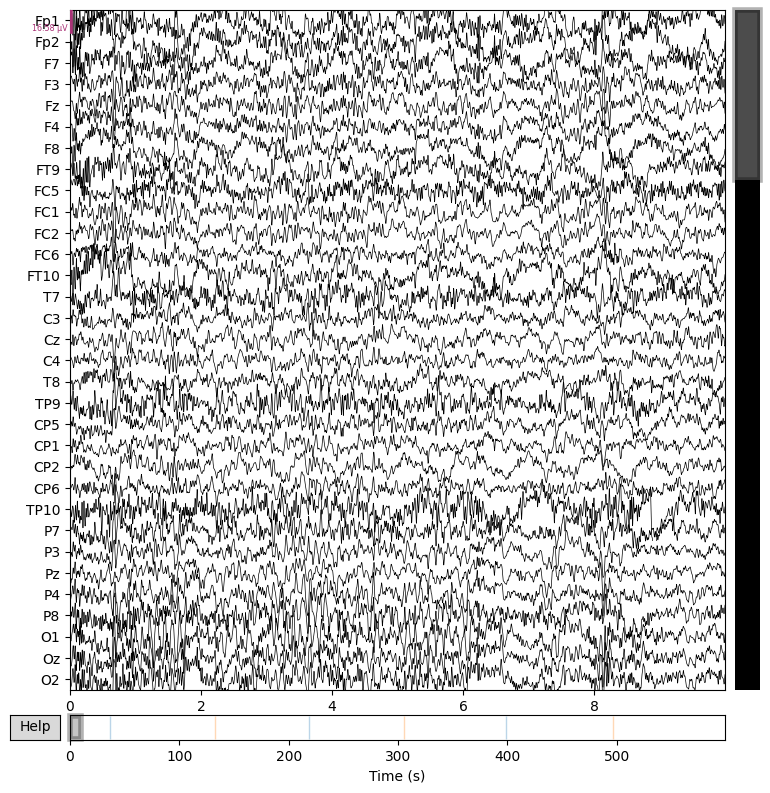

In [20]:
import mne
import matplotlib.pyplot as plt

# === 1. Чтение EEG ===
raw = mne.io.read_raw_eeglab('/mnt/d/Study/PhD/Data/sample_eyes/fon/fon/Co_y6_003_fon1.set', preload=True)

# === 2. Информация о записи ===
sfreq = raw.info['sfreq']                # частота дискретизации, Гц
n_samples = raw.n_times                  # количество отсчётов
duration_sec = n_samples / sfreq         # длина в секундах

print(f'Частота дискретизации: {sfreq:.2f} Гц')
print(f'Количество сэмплов: {n_samples}')
print(f'Длина записи: {duration_sec:.2f} сек ({duration_sec/60:.2f} мин)')

# === 3. Отрисовка EEG ===
# Убираем "BAD boundary" и т.п., если мешают
raw.plot(n_channels=32, duration=10, scalings='auto', title='EEG сигнал')
plt.show()

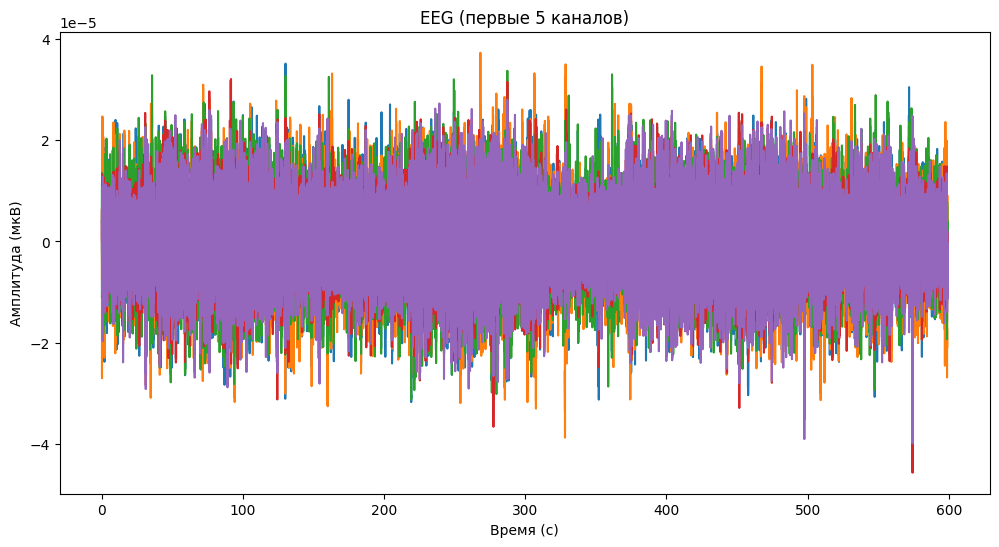

In [21]:
data, times = raw[:5, :]  # первые 5 каналов
plt.figure(figsize=(12, 6))
plt.plot(times, data.T)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда (мкВ)')
plt.title('EEG (первые 5 каналов)')
plt.show()